<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%205/Modulo_5_Ejercicio_5_CrossValidation_Comparativa_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 5: ¿Cuán estable es tu modelo? Evalúa su rendimiento con validación cruzada**
**Aplicación de Hold-out, KFold y StratifiedKFold en un problema de clasificación desbalanceada**

### **Introducción**
En este ejercicio aprenderás a aplicar correctamente la **validación cruzada** para evaluar la estabilidad de un modelo y su capacidad de generalización. Analizaremos un problema de clasificación binaria con clases desbalanceadas, y compararemos el rendimiento del modelo utilizando **una única partición** (hold-out) frente a múltiples particiones con **K-Fold** y **StratifiedKFold**. Estudiaremos la **variabilidad** entre particiones, un aspecto clave para saber si podemos confiar en nuestras métricas de evaluación.

In [1]:
# Celda 1: Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
sns.set(style='whitegrid')

In [2]:
# Celda 2: Cargar el dataset
url = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_circuitos_electronicos.csv'
df = pd.read_csv(url)
df.head()

,ID_componente,Voltaje_operación,Corriente_fuga,Resistencia_circuito,Frecuencia_operación,Temperatura_prueba,Horas_operación,Proveedor_material,Modelo_chip,Método_prueba,Fallo_circuito
0,1,5.248357,1.934405,1055.302146,2.415568,71.648138,6826.235678,Proveedor_2,Modelo_8,Método_C,OK
1,2,4.930868,2.114882,1208.739222,2.379194,74.617461,4889.806377,Proveedor_5,Modelo_8,Método_C,OK
2,3,5.323844,2.220543,1000.776616,2.362610,83.187345,4272.656141,Proveedor_4,Modelo_10,Método_B,KO
3,4,5.761515,1.644991,792.359071,2.120637,71.668613,4639.328169,Proveedor_4,Modelo_2,Método_C,OK
4,5,4.882923,2.030222,1235.237438,2.320803,77.624833,6439.710569,Proveedor_3,Modelo_14,Método_C,OK


In [3]:
# Celda 3: Preprocesamiento básico
X = df.drop(columns=['ID_componente', 'Fallo_circuito'])
y = df['Fallo_circuito'].map({'OK': 0, 'KO': 1})

In [4]:
# Celda 4: Imputación y codificación
X = pd.get_dummies(X, drop_first=True)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [5]:
# Celda 5: Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [6]:
# Celda 6: Hold-out (train/test split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     23913
           1       0.00      0.00      0.00      1287

    accuracy                           0.95     25200
   macro avg       0.47      0.50      0.49     25200
weighted avg       0.90      0.95      0.92     25200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Celda 7: KFold (5 particiones)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_kf = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')
acc_kf = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
print('F1 Score por fold (KFold):', f1_kf)
print('Accuracy por fold (KFold):', acc_kf)

F1 Score por fold (KFold): [0. 0. 0. 0. 0.]
Accuracy por fold (KFold): [0.95055556 0.94809524 0.94630952 0.94734127 0.95230159]


In [11]:
# Celda 8: StratifiedKFold (5 particiones)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_skf = cross_val_score(model, X_scaled, y, cv=skf, scoring='f1')
acc_skf = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')
print('F1 Score por fold (StratifiedKFold):', f1_skf)
print('Accuracy por fold (StratifiedKFold):', acc_skf)

F1 Score por fold (StratifiedKFold): [0. 0. 0. 0. 0.]
Accuracy por fold (StratifiedKFold): [0.94892857 0.94892857 0.94892857 0.94892857 0.94888889]


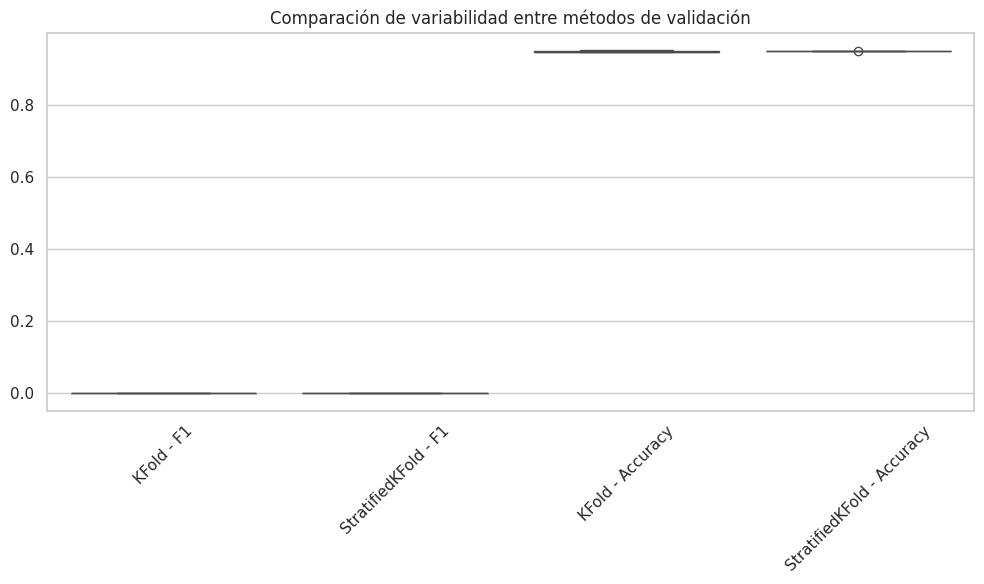

In [12]:
# Celda 9: Boxplots para comparar variabilidad
df_cv = pd.DataFrame({
    'KFold - F1': f1_kf,
    'StratifiedKFold - F1': f1_skf,
    'KFold - Accuracy': acc_kf,
    'StratifiedKFold - Accuracy': acc_skf
})
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cv)
plt.title('Comparación de variabilidad entre métodos de validación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Conclusiones**
- La validación con **KFold** y **StratifiedKFold** ofrece una visión más robusta del rendimiento del modelo comparado con un único `train_test_split`.
- **StratifiedKFold** mantiene la proporción de clases en cada fold, lo cual es esencial en datasets desbalanceados.
- Observar la **variabilidad entre folds** ayuda a evaluar la estabilidad del modelo y detectar si nuestras métricas son consistentes o dependen de una partición afortunada.

### **Preguntas para reflexionar**
- ¿Qué método usarías si tu dataset es pequeño? ¿Y si es grande?
- ¿Cómo influye el desbalance de clases en la elección de la técnica de validación?
- ¿Por qué deberías reportar también la desviación estándar de tus métricas?